## Set up

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import json
from typing import Iterable

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.axes import Axes

from sf_permits.config import logger, PROFILING_DATA_DIR, FIGURES_DIR

sns.set_theme()

In [11]:
metric_dicts = {}
for path in PROFILING_DATA_DIR.glob("*.json"):
    metric = path.stem
    logger.info("Loading metric {}", metric)
    with path.open() as f:
        metric_dicts[metric] = json.load(f)

2025-01-04 10:53:25.272 | INFO     | __main__:<module>:4 - Loading metric duplication
2025-01-04 10:53:25.273 | INFO     | __main__:<module>:4 - Loading metric completeness
2025-01-04 10:53:25.273 | INFO     | __main__:<module>:4 - Loading metric correlation
2025-01-04 10:53:25.274 | INFO     | __main__:<module>:4 - Loading metric original_dtypes
2025-01-04 10:53:25.274 | INFO     | __main__:<module>:4 - Loading metric inferred_dtypes
2025-01-04 10:53:25.274 | INFO     | __main__:<module>:4 - Loading metric standard_deviation_outliers
2025-01-04 10:53:25.277 | INFO     | __main__:<module>:4 - Loading metric inter_quantile_outliers
2025-01-04 10:53:25.306 | INFO     | __main__:<module>:4 - Loading metric uniqueness
2025-01-04 10:53:25.307 | INFO     | __main__:<module>:4 - Loading metric distribution
2025-01-04 10:53:25.307 | INFO     | __main__:<module>:4 - Loading metric interestingness


In [12]:
def table_attribute_values(metric: dict) -> pd.Series:
    table = metric.get("table", None)
    attributes = metric["attributes"]
    if table is not None:
        attributes["table"] = table
    return pd.Series(attributes)

In [13]:
def barplot(metirc_dict, figsize=(8, 10)):
    fig, ax = plt.subplots(figsize=figsize, layout="constrained")
    sns.barplot(
        table_attribute_values(metirc_dict).sort_values(),
        orient="h",
        ax=ax,
    )
    return fig, ax

## Dimensions

### Completeness

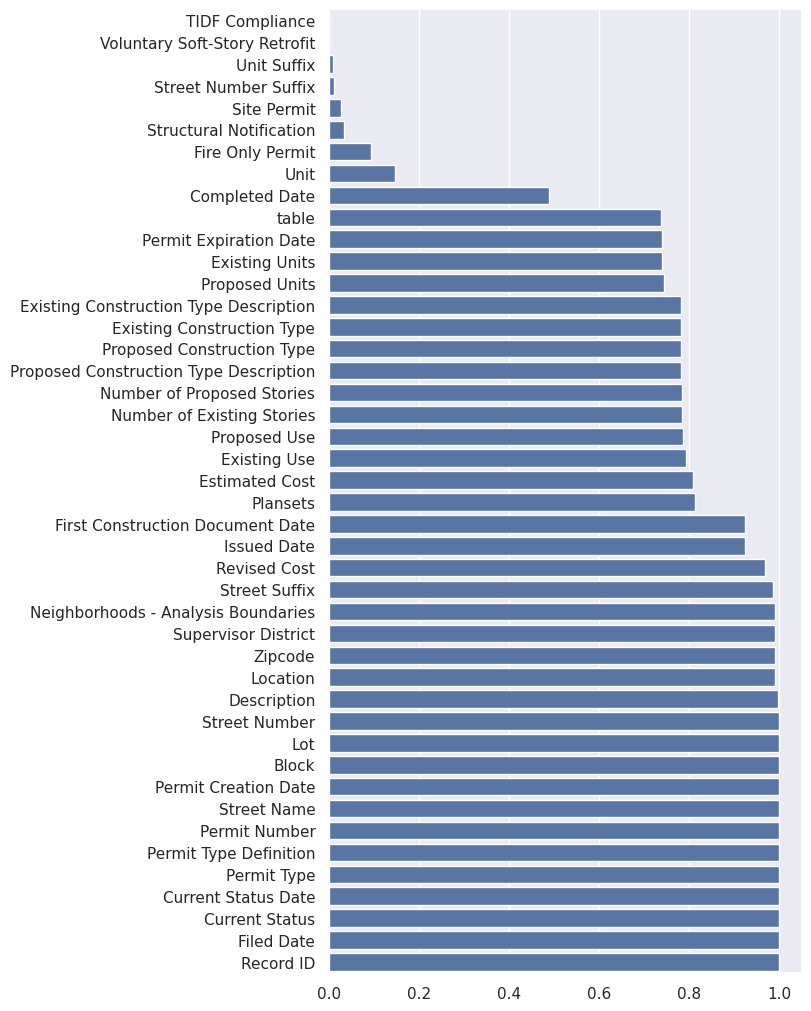

In [23]:
fig, ax = barplot(metric_dicts["completeness"])
fig.savefig(FIGURES_DIR / "completeness.png")

* Are missing values in the `Completed Date` due to lack of data or incomplete works?
* Two very distinct patterns: variables mostly missing and mostly present

### Correlation

In [24]:
correlation_df = pd.DataFrame(metric_dicts["correlation"]["table"])
correlation_df

,Permit Type,Street Number,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode,Record ID
Permit Type,1.000000,-0.002281,0.031978,0.057106,0.055431,-0.120878,-0.120083,-0.003030,-0.013665,-0.011480,-0.004265,-0.033203,-0.049109,-0.012200,-0.015621
Street Number,-0.002281,1.000000,-0.040662,-0.218557,-0.215047,-0.011152,-0.010828,-0.054865,-0.055468,-0.003298,0.228214,0.224609,-0.131445,0.107763,-0.039808
Unit,0.031978,-0.040662,1.000000,0.167038,0.168811,-0.009094,-0.007559,0.222569,0.227423,-0.081970,-0.217840,-0.219103,-0.027666,0.003612,-0.275457
Number of Existing Stories,0.057106,-0.218557,0.167038,1.000000,0.997356,0.030248,0.039181,0.295527,0.294521,0.009473,-0.679218,-0.686347,-0.169487,-0.341470,-0.147271
Number of Proposed Stories,0.055431,-0.215047,0.168811,0.997356,1.000000,0.050336,0.049165,0.294658,0.304492,0.009547,-0.688179,-0.683090,-0.168097,-0.342105,-0.147121
Estimated Cost,-0.120878,-0.011152,-0.009094,0.030248,0.050336,1.000000,0.978798,0.014161,0.070412,0.001451,-0.048703,-0.056787,0.009876,-0.010436,0.003439
Revised Cost,-0.120083,-0.010828,-0.007559,0.039181,0.049165,0.978798,1.000000,0.015667,0.065279,0.001309,-0.057447,-0.048473,0.007252,-0.007235,0.004590
Existing Units,-0.003030,-0.054865,0.222569,0.295527,0.294658,0.014161,0.015667,1.000000,0.994071,0.001243,-0.272255,-0.273619,-0.045800,-0.131599,-0.020978
Proposed Units,-0.013665,-0.055468,0.227423,0.294521,0.304492,0.070412,0.065279,0.994071,1.000000,0.001548,-0.275976,-0.289255,-0.040889,-0.137086,-0.018544
Plansets,-0.011480,-0.003298,-0.081970,0.009473,0.009547,0.001451,0.001309,0.001243,0.001548,1.000000,-0.013277,-0.013005,0.001314,-0.005074,-0.001823


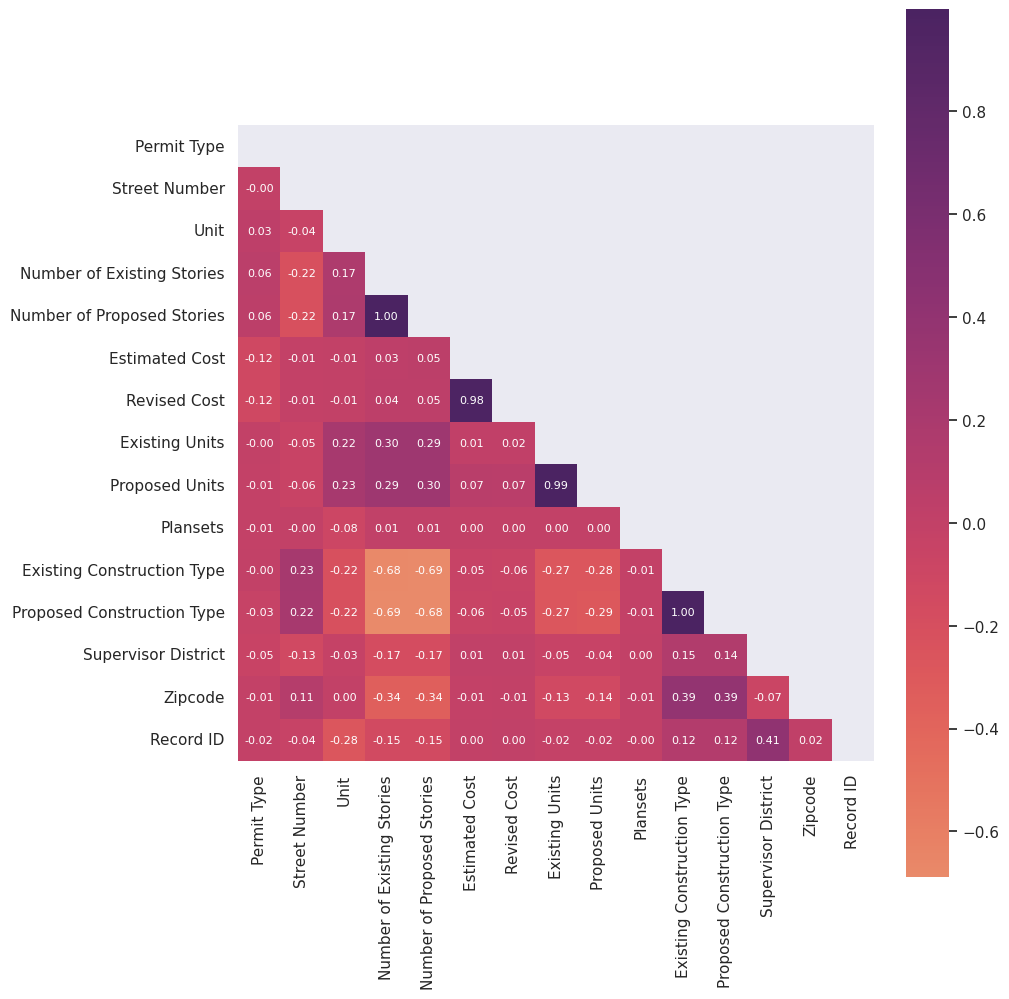

In [33]:
fig, ax = plt.subplots(figsize=(10, 10), layout="constrained")
sns.heatmap(
    correlation_df,
    mask=np.triu(np.ones_like(correlation_df, dtype=bool)),
    center=0,
    square=True,
    cmap="flare",
    annot=True,
    fmt=".2f",
    annot_kws={"fontsize": 8},
    ax=ax,
)
ax.grid(False)
fig.savefig(FIGURES_DIR / "correlation.png")

* Might be interesting to look at pair plot between variables with high absolute correlation?

### Duplication

In [18]:
metric_dicts["duplication"]["attributes"]["Description"]

0.32394139267911987

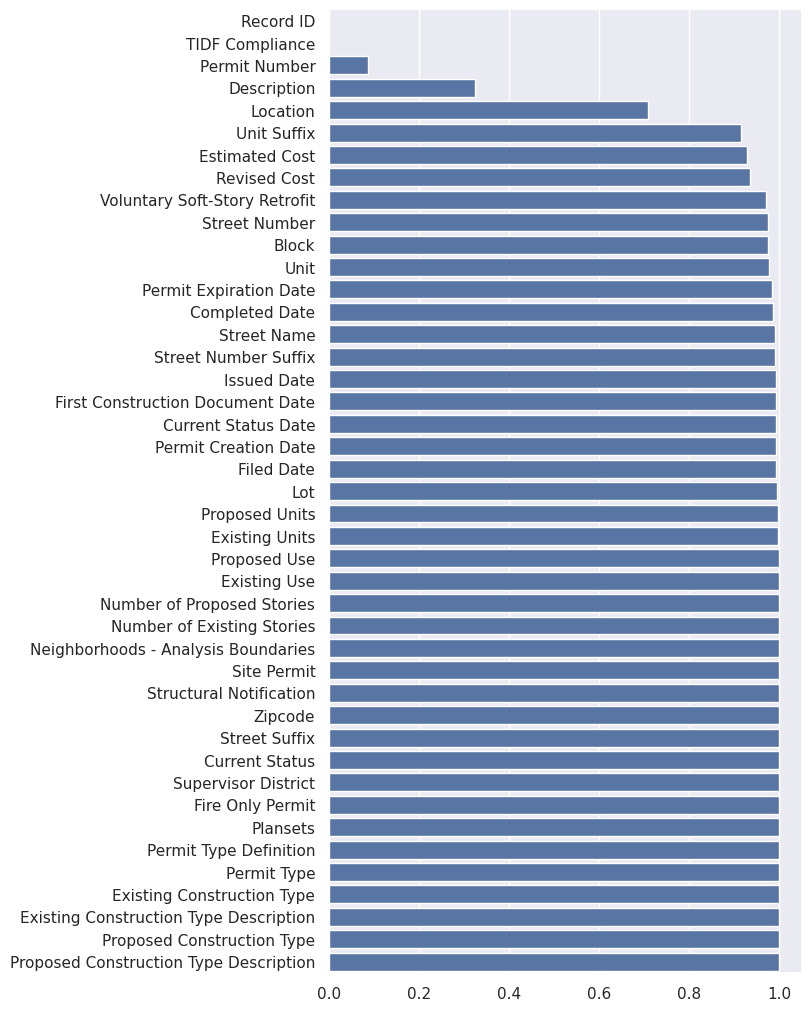

In [26]:
fig, ax = barplot(metric_dicts["duplication"])
fig.savefig(FIGURES_DIR / "duplication.png")

* Why are there duplicated permit numbers?
* Description is an interesting case: not completely unique but not completely different either

### Data types

In [27]:
pd.DataFrame(
    (
        pd.Series(metric_dicts["original_dtypes"]["table"], name="original"),
        pd.Series(metric_dicts["inferred_dtypes"]["table"], name="inferred"),
    )
).T

,original,inferred
Permit Number,object,string
Permit Type,int64,Int64
Permit Type Definition,object,string
Permit Creation Date,object,string
Block,object,string
Lot,object,string
Street Number,int64,Int64
Street Number Suffix,object,string
Street Name,object,string
Street Suffix,object,string


* `Number of Stories` wasn't inferred as integer, so are there floating point numbers of stories?
* `Zipcode` was encoded as `float` in original dataset, so we'll want to recode as string, possibly padding with zeros

### Distribution

In [6]:
distribution_df = pd.DataFrame(metric_dicts["distribution"]["attributes"]).T.rename(
    columns={
        "50%": "med",
        "25%": "q1",
        "75%": "q3",
    }
)
distribution_df

,count,mean,std,min,q1,med,q3,max
Permit Type,198900.0,7.522323e+00,1.457451e+00,1.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
Street Number,198900.0,1.121729e+03,1.135769e+03,0.000000e+00,2.350000e+02,7.100000e+02,1.700000e+03,8.400000e+03
Unit,29479.0,7.851718e+01,3.269813e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.004000e+03
Number of Existing Stories,156116.0,5.705773e+00,8.613455e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,7.800000e+01
Number of Proposed Stories,156032.0,5.745043e+00,8.613284e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,7.800000e+01
Estimated Cost,160834.0,1.689554e+05,3.630386e+06,1.000000e+00,3.300000e+03,1.100000e+04,3.500000e+04,5.379586e+08
Revised Cost,192834.0,1.328562e+05,3.584903e+06,0.000000e+00,1.000000e+00,7.000000e+03,2.870750e+04,7.805000e+08
Existing Units,147362.0,1.566616e+01,7.447632e+01,0.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,1.907000e+03
Proposed Units,147989.0,1.651095e+01,7.522044e+01,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,1.911000e+03
Plansets,161591.0,1.274650e+00,2.240735e+01,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,9.000000e+03


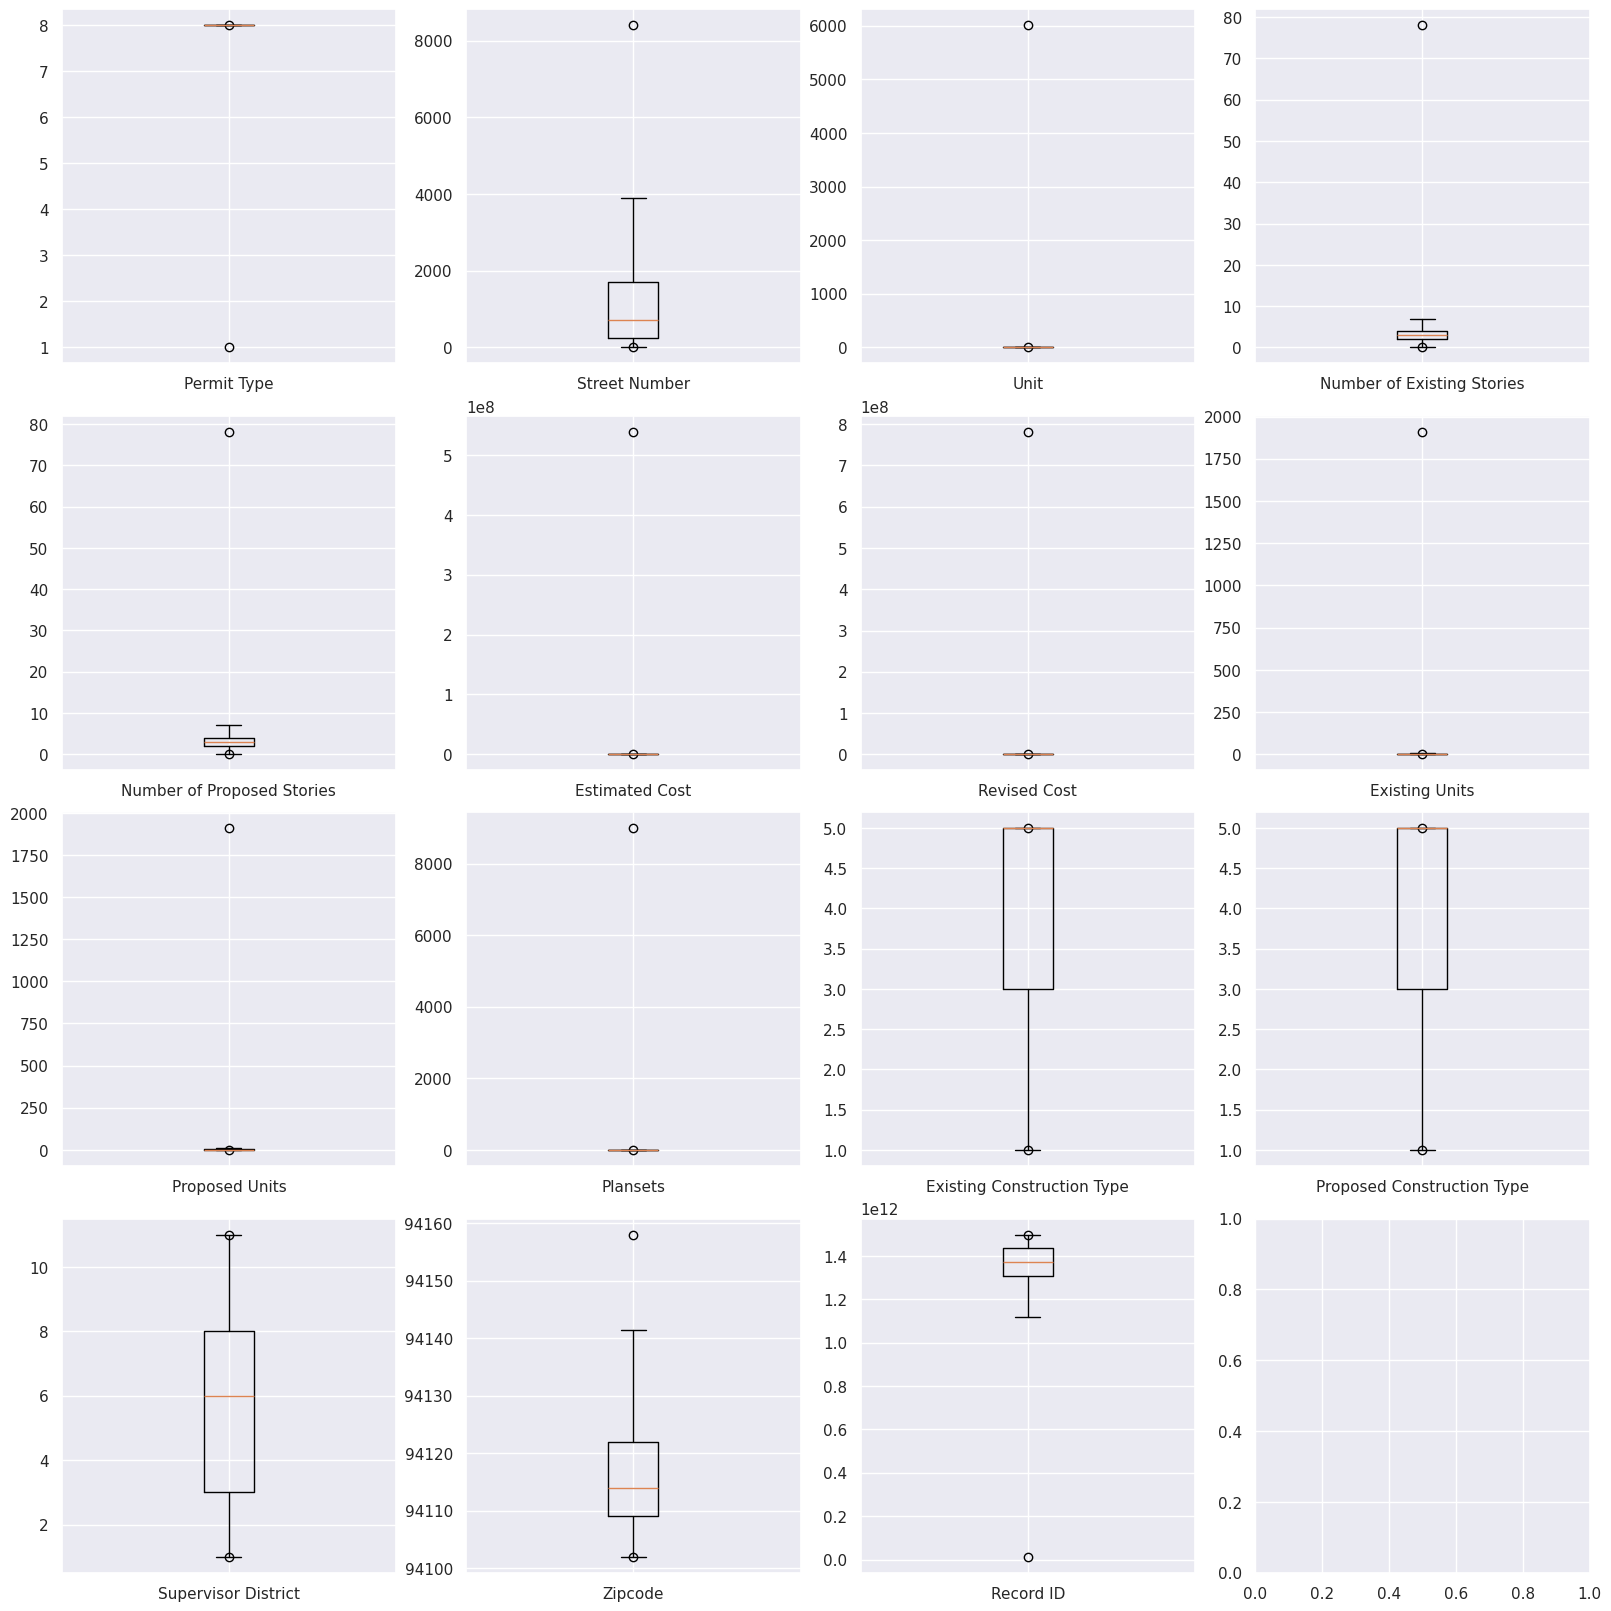

In [8]:
fig, axes = plt.subplots(
    ncols=4,
    nrows=distribution_df.shape[0] // 4 + 1,
    figsize=(16, 16),
    layout="constrained",
)
axes: Iterable[Axes] = axes.ravel()
for ax, (attribute, statistics) in zip(axes, distribution_df.iterrows()):
    inter_quntile_range = statistics["q3"] - statistics["q1"]
    statistics["whislo"] = np.max(
        [statistics["q1"] - 1.5 * inter_quntile_range, statistics["min"]]
    )
    statistics["whishi"] = np.min(
        [statistics["q3"] + 1.5 * inter_quntile_range, statistics["max"]]
    )
    statistics["fliers"] = [statistics["min"], statistics["max"]]
    statistics["label"] = attribute
    ax.bxp(
        [statistics],
        meanline=True,
    )
fig.savefig(FIGURES_DIR / "distribution.png")

* There's basically only a single type of permit
* Some outliers in costs, units and plansets; perhaps from the same tuple?
* At least one `Record ID` equal to 0

### Interestingness

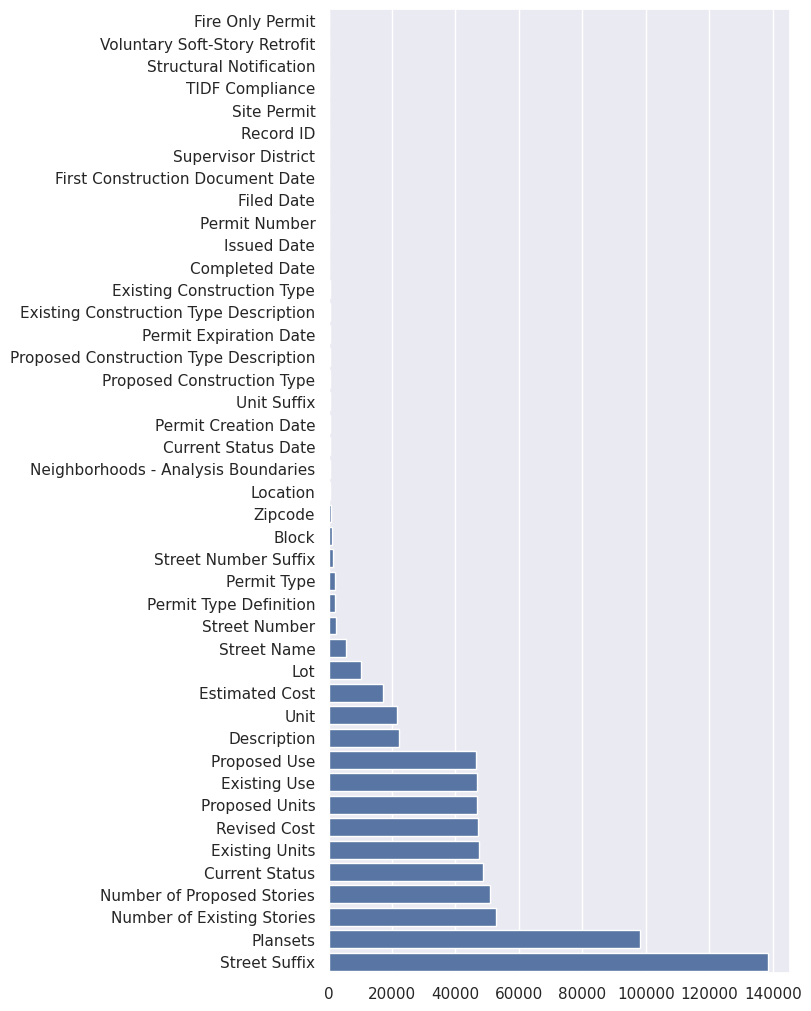

In [30]:
fig, ax = barplot(metric_dicts["interestingness"], figsize=(8, 10))
fig.savefig(FIGURES_DIR / "interestingness.png")

### Uniqueness

In [31]:
UNIQUENESS_DIR = FIGURES_DIR / "uniqueness"
UNIQUENESS_DIR.mkdir(exist_ok=True)

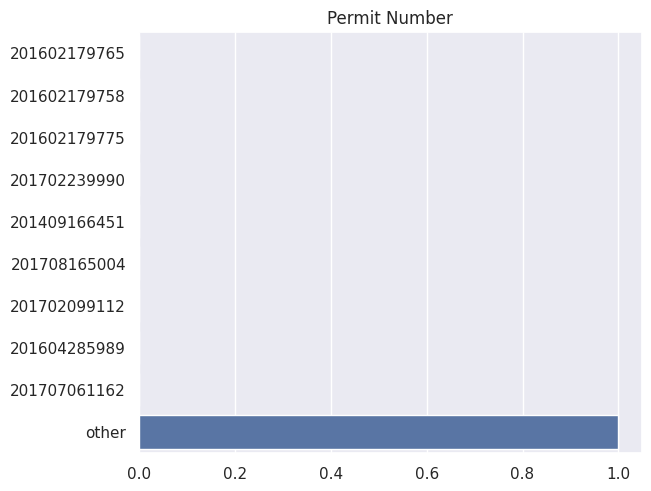

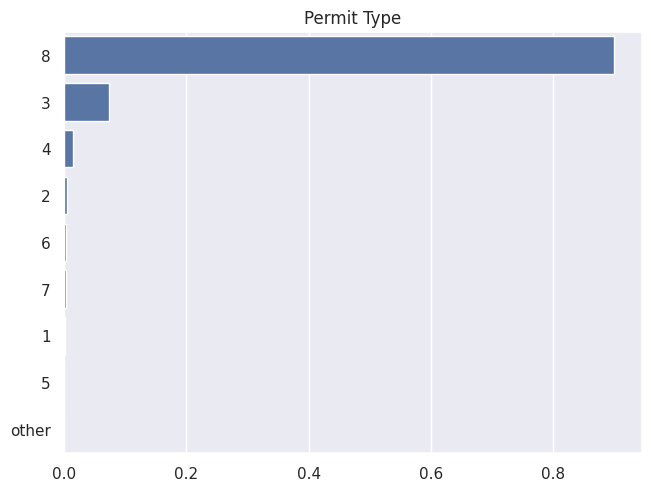

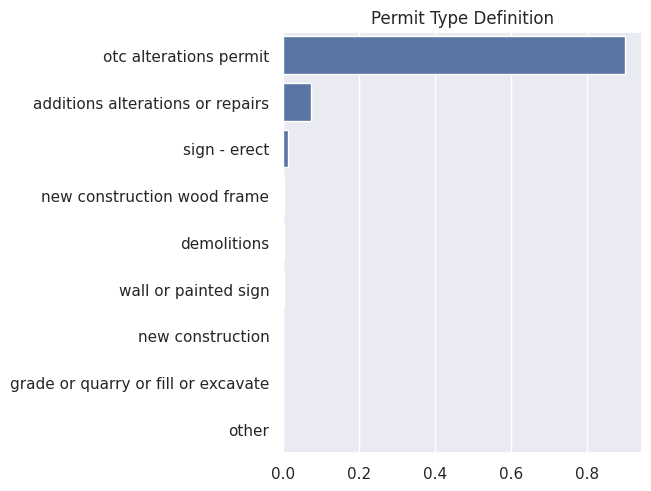

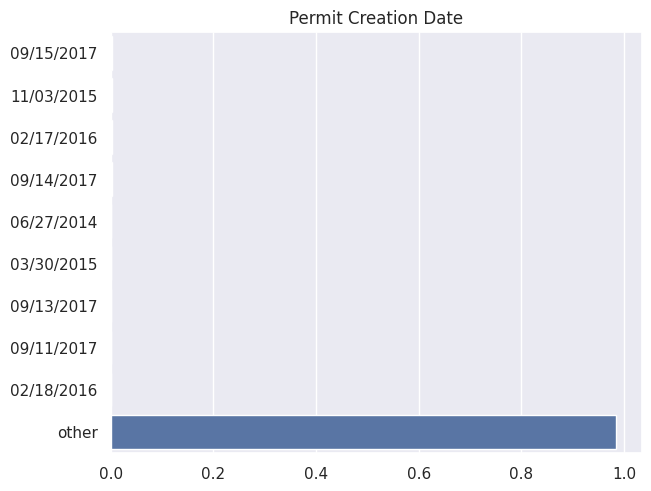

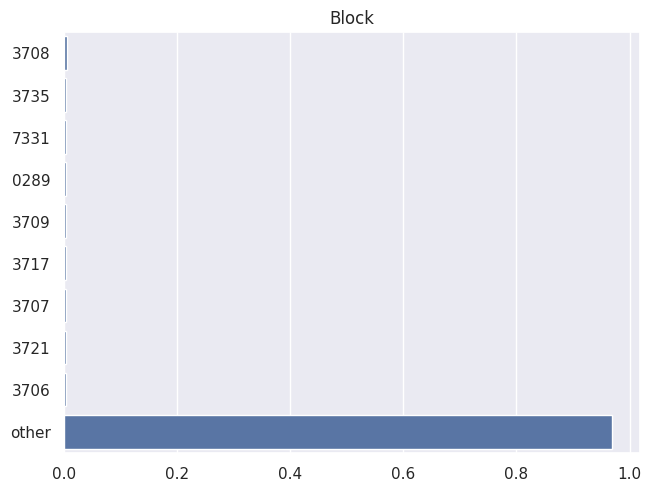

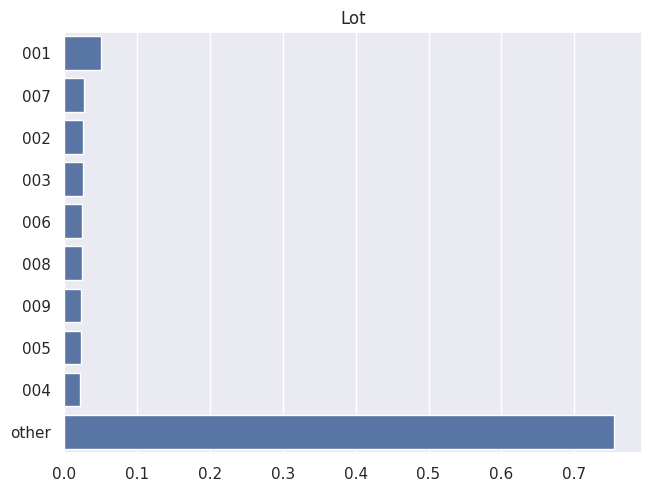

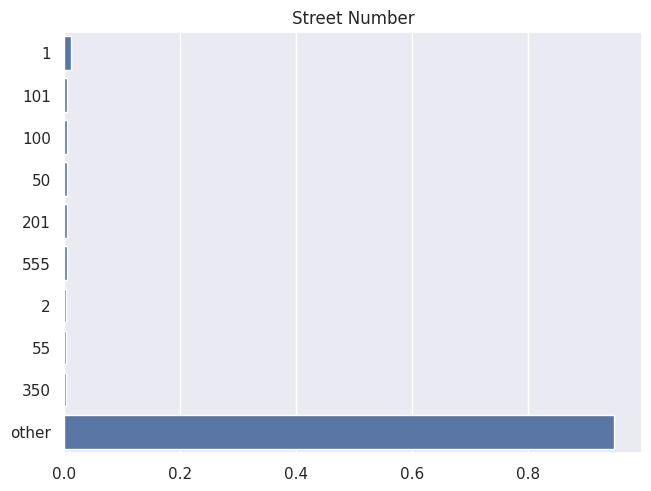

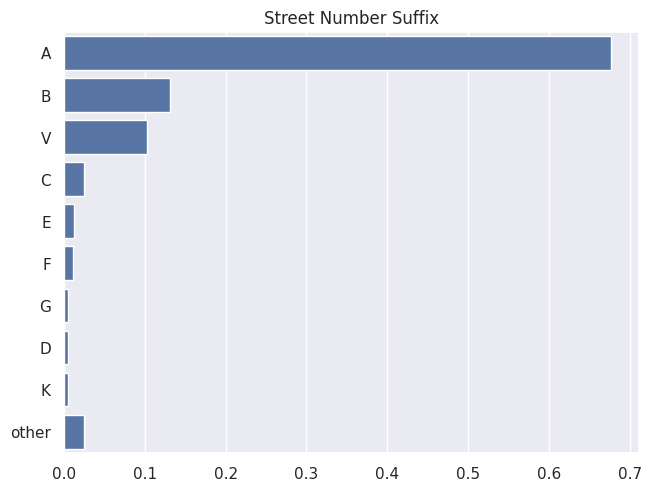

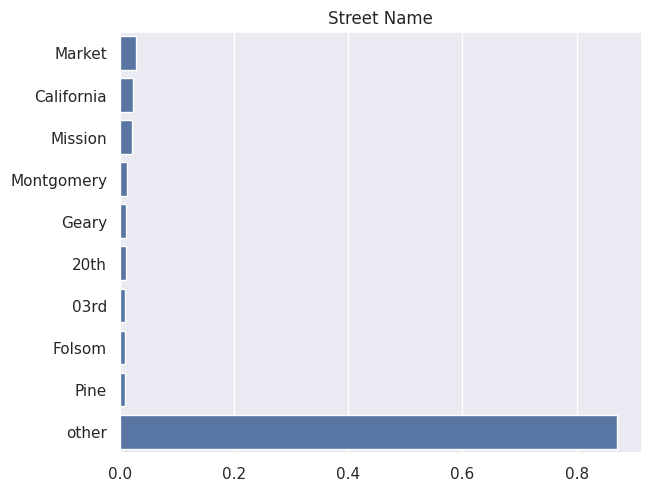

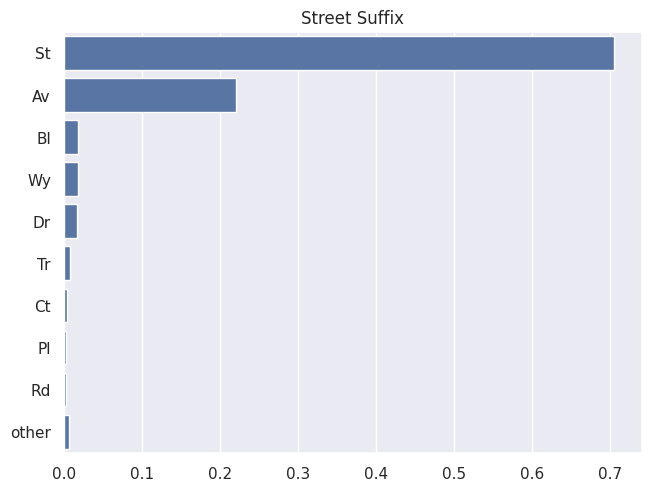

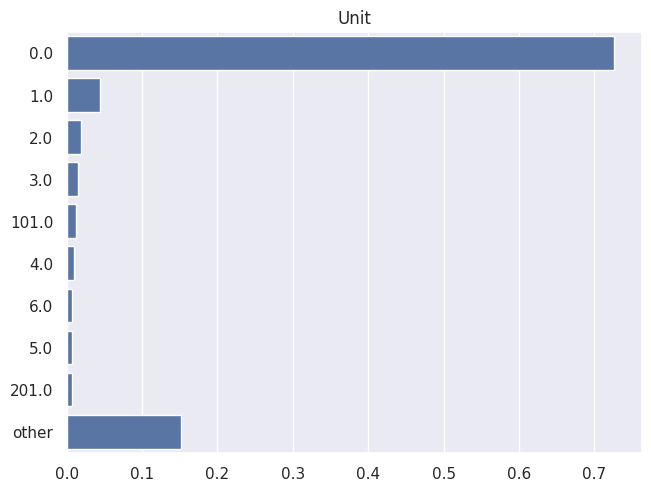

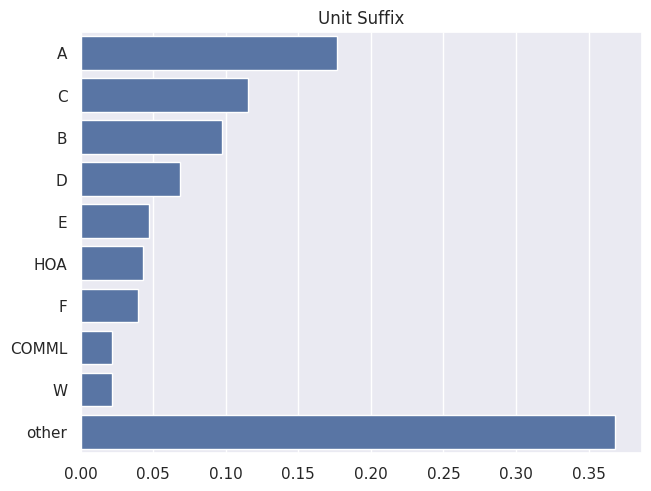

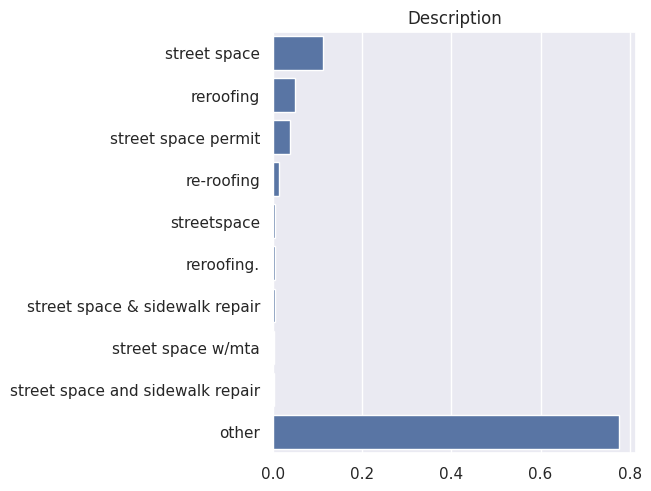

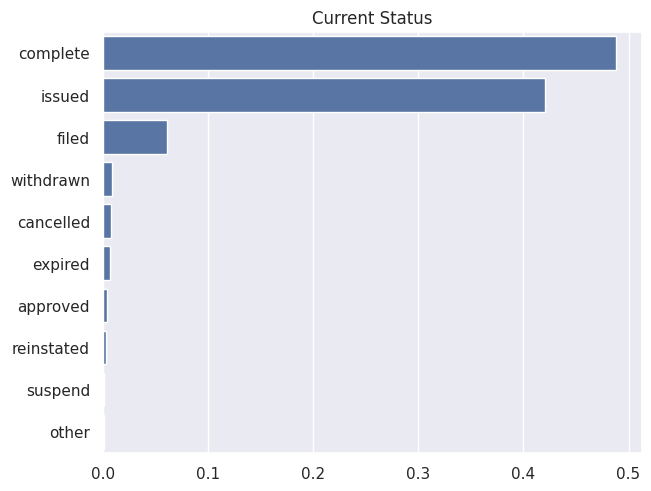

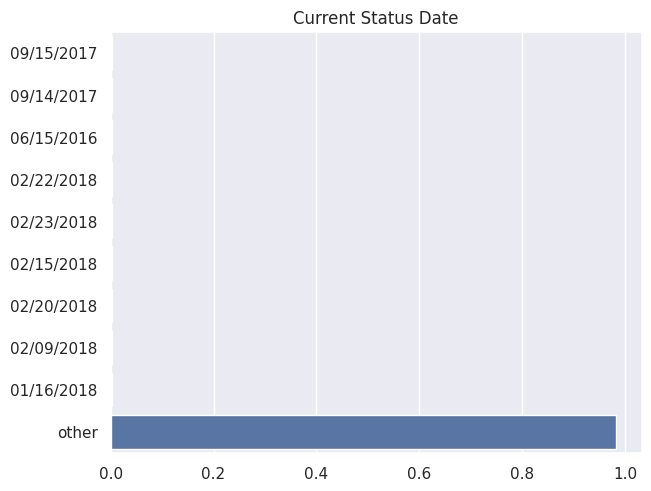

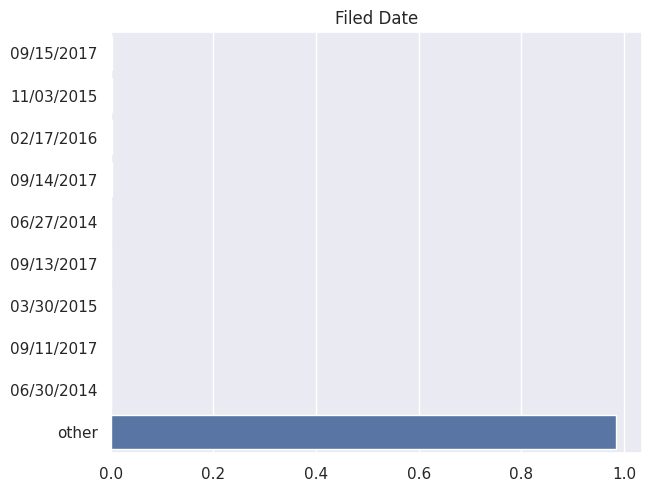

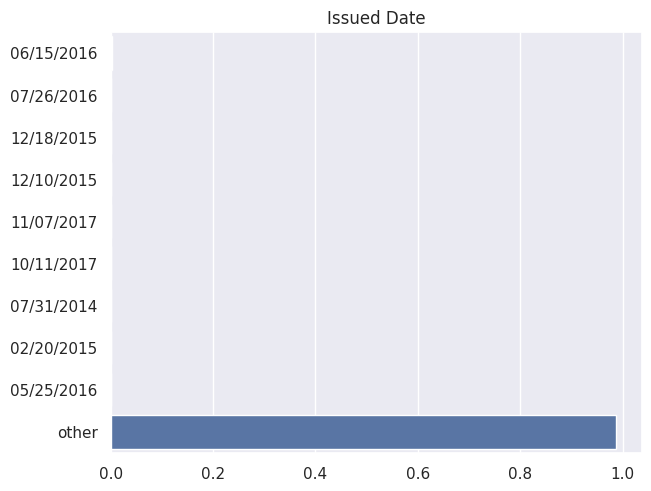

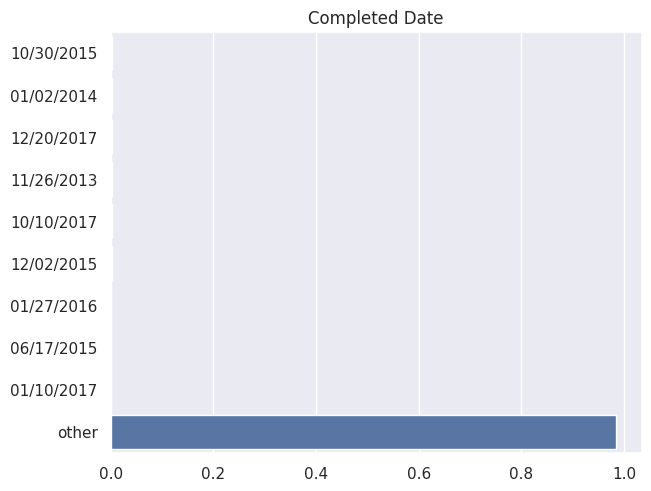

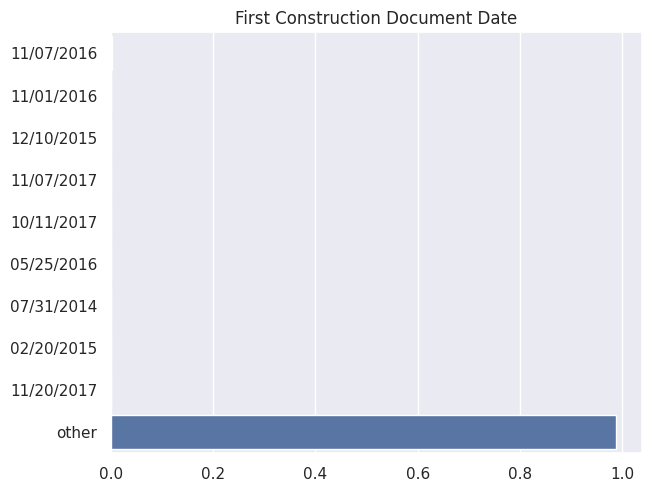

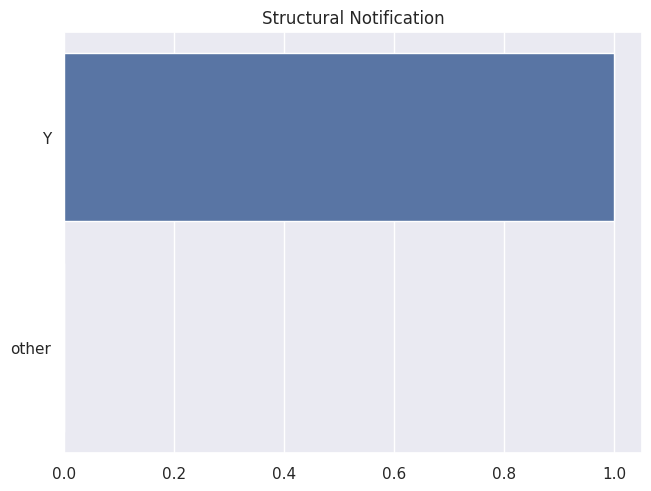

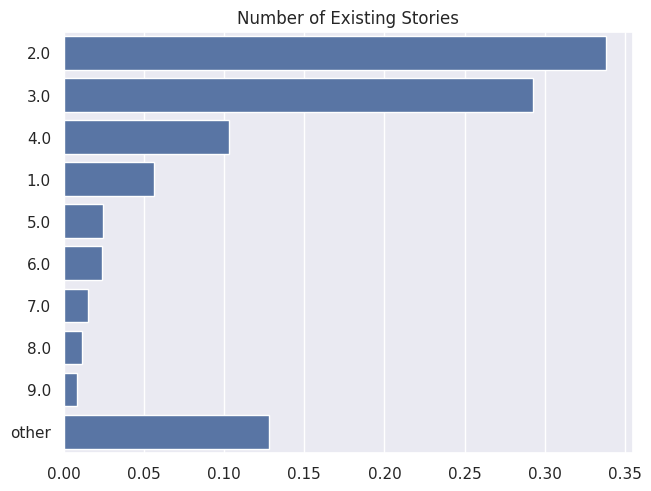

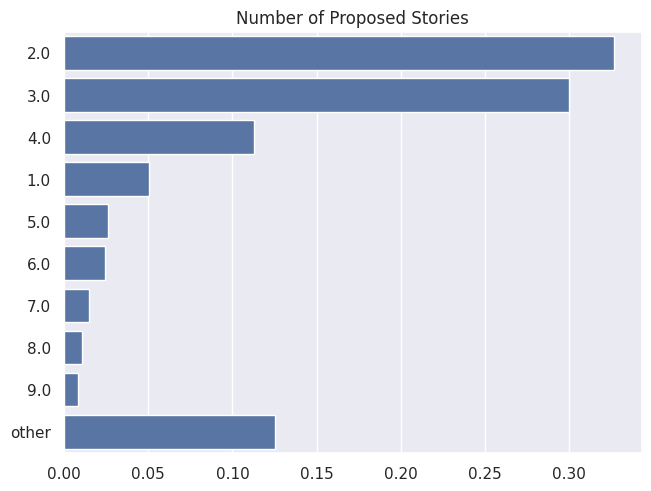

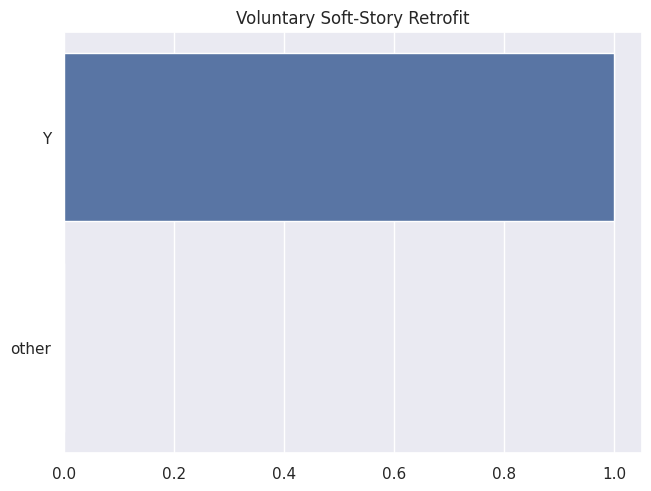

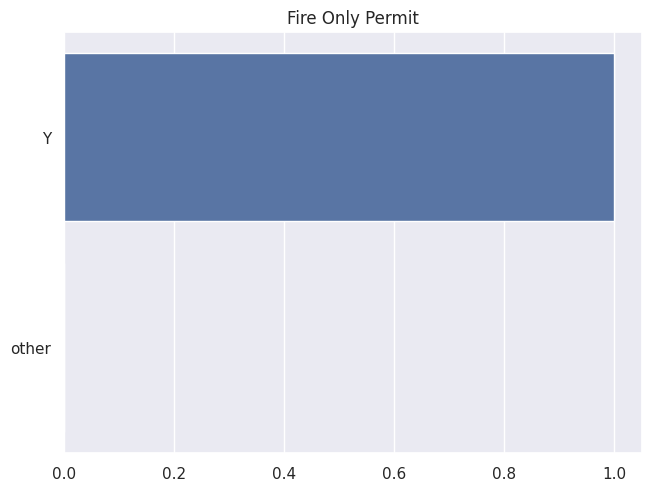

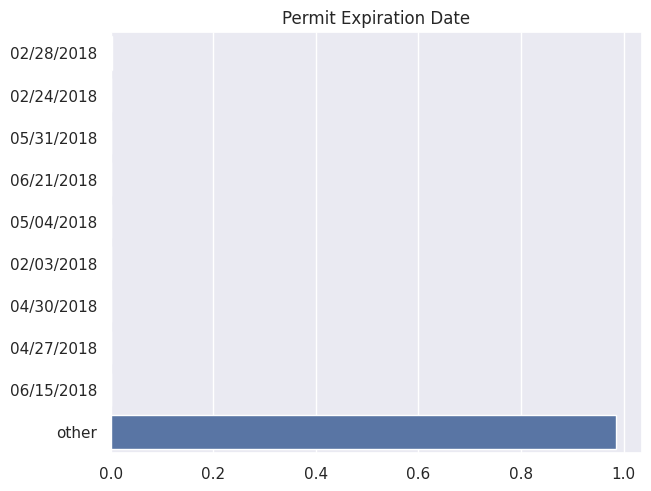

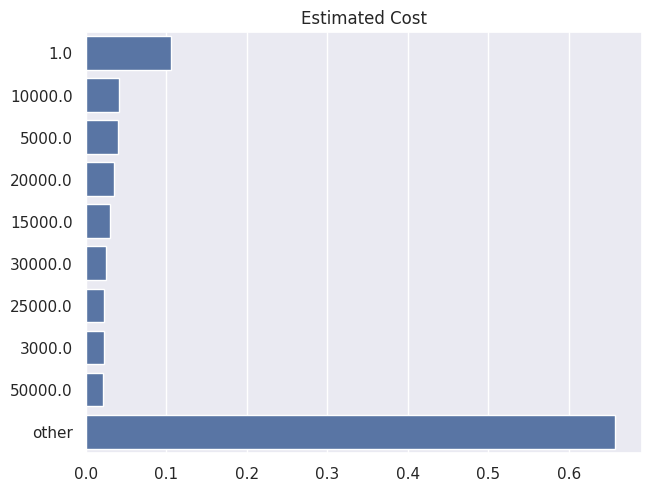

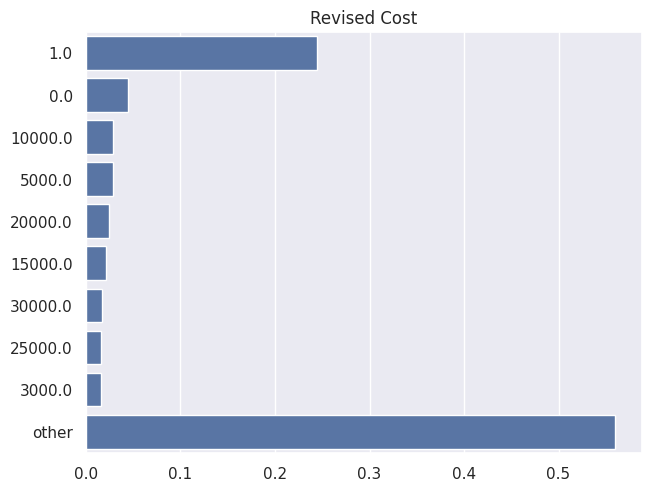

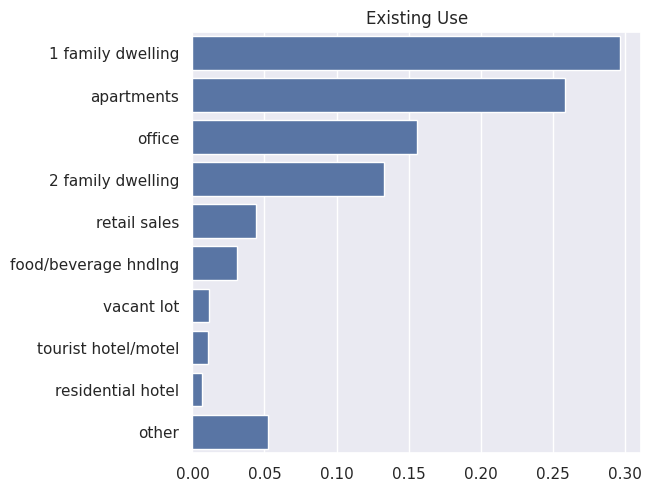

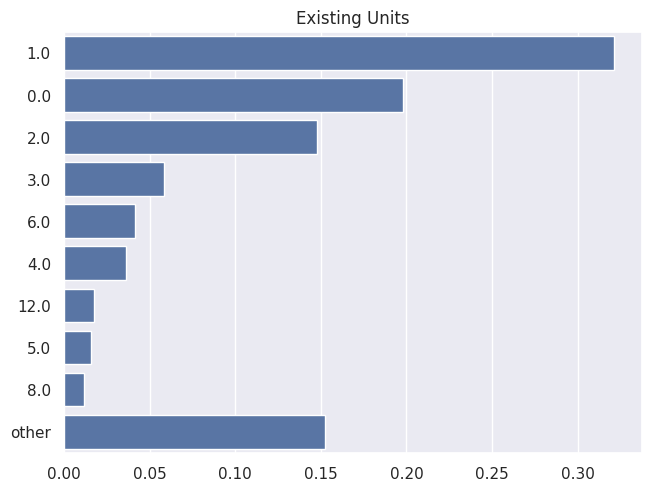

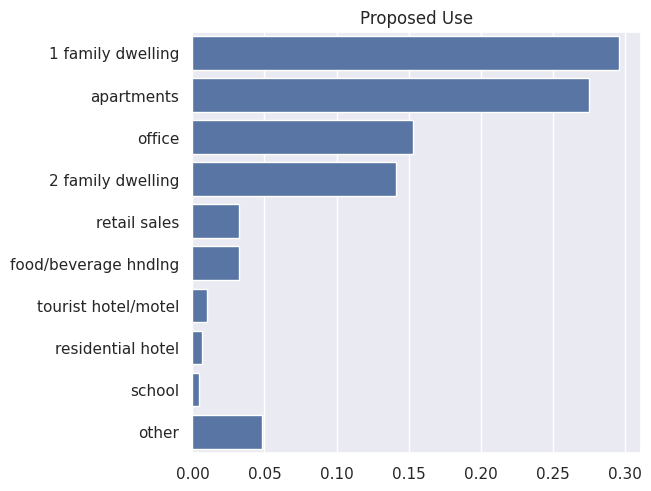

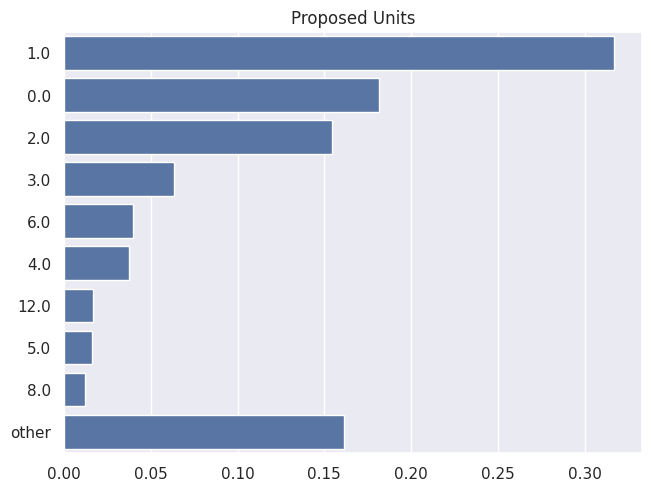

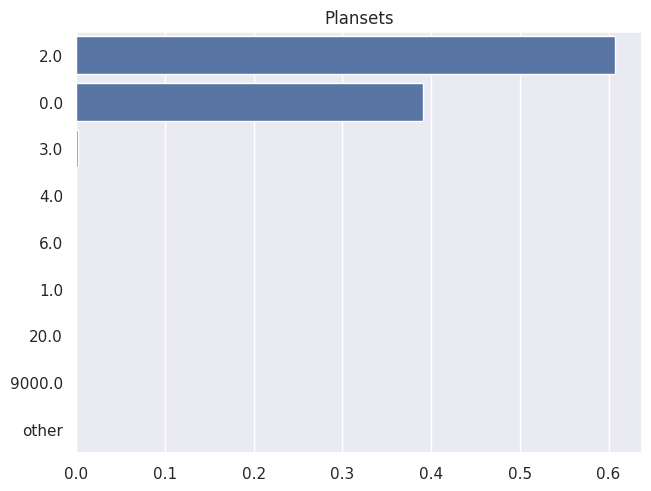

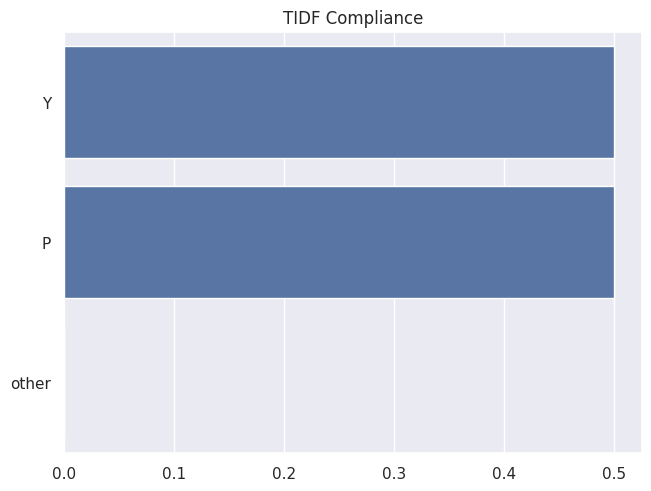

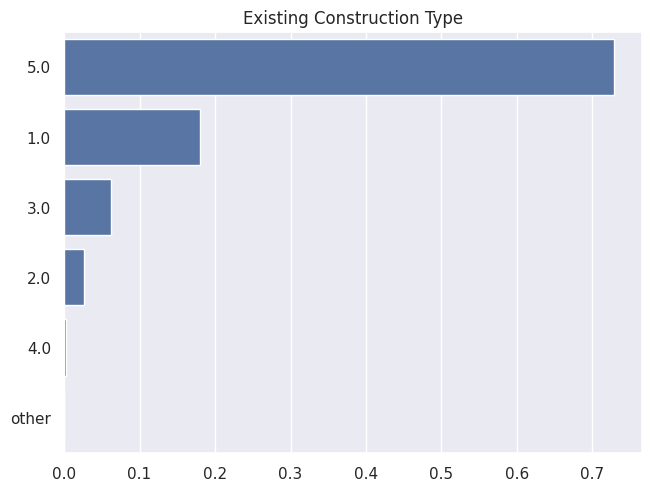

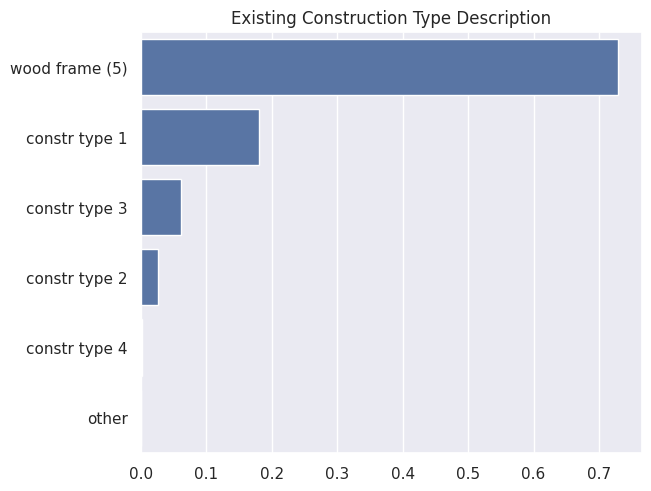

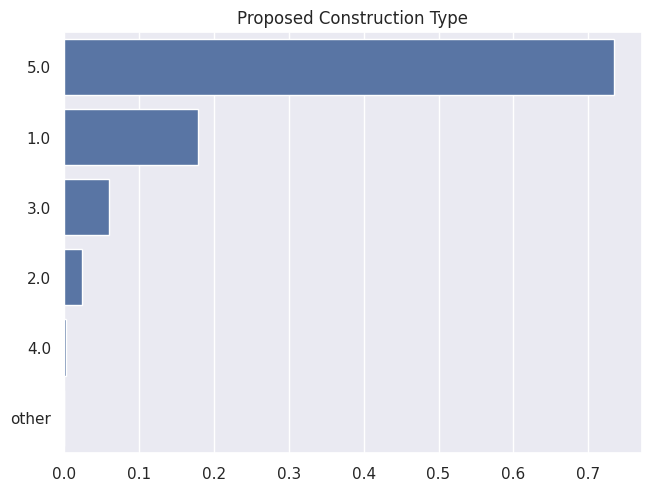

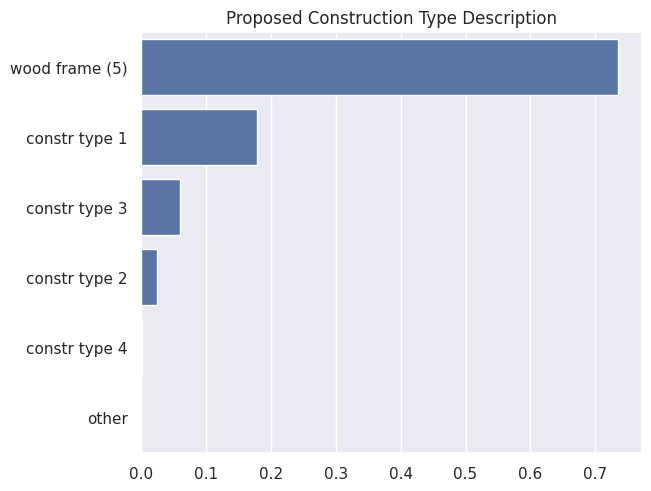

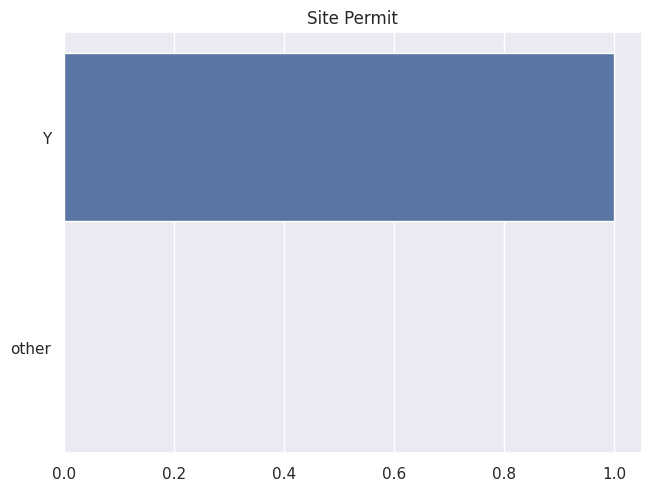

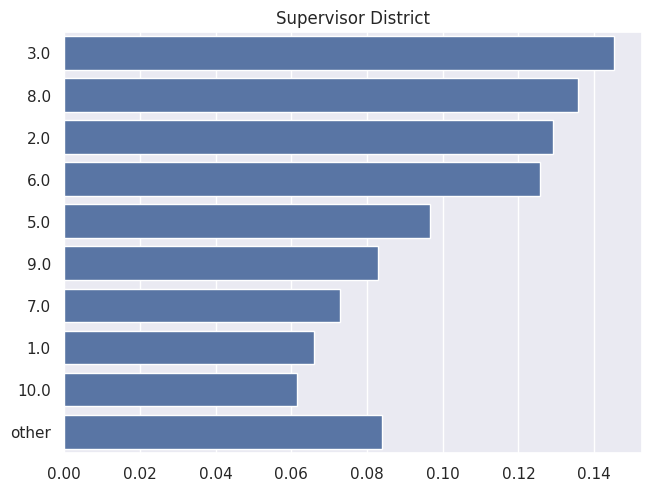

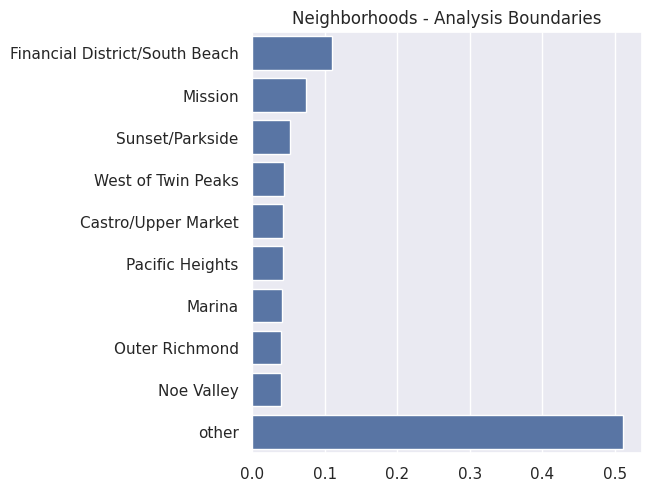

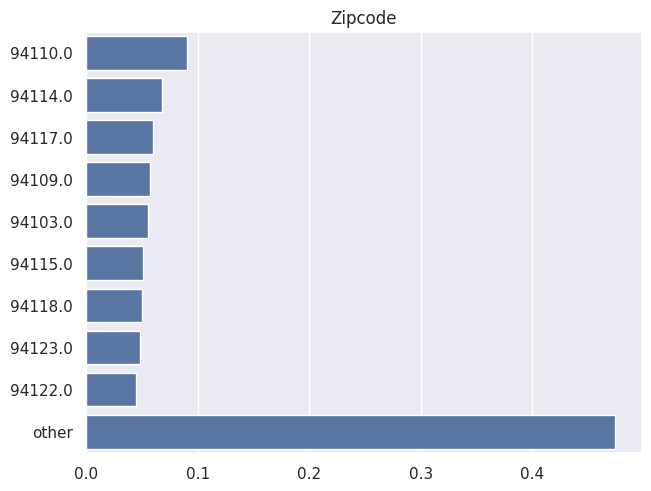

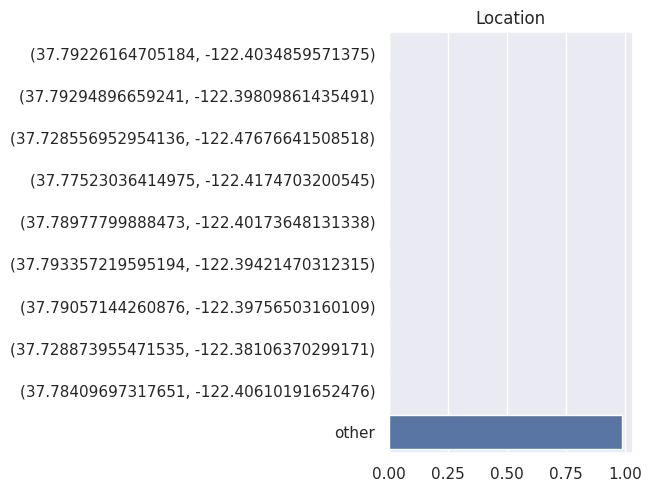

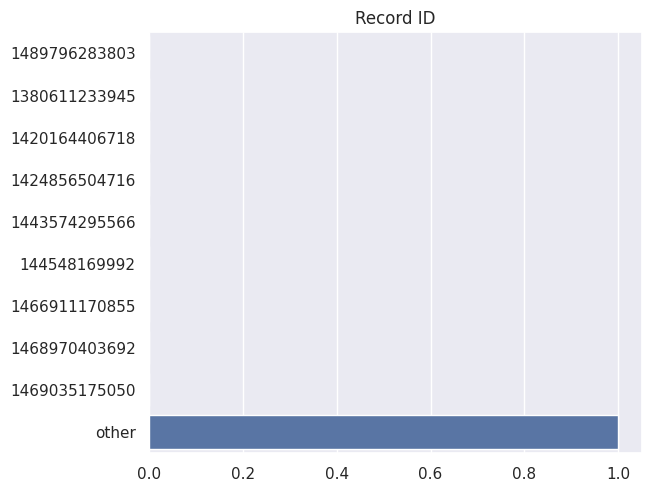

In [32]:
value_percentages = metric_dicts["uniqueness"]["attributes"]
for attribute, attribute_percentages in value_percentages.items():
    fig, ax = plt.subplots(layout="constrained")
    sns.barplot(attribute_percentages, orient="h", ax=ax)
    ax.set_title(attribute)
    fig.savefig(UNIQUENESS_DIR / f"{attribute}.png")
    plt.show()

* `Fire Only Permit`, `Voluntary Soft-Story Refit` and `Structural Notification` have a single value each (`Y`), likely implying missing as negative
* `Neighborhood` seems a bit weird
* Encode as categorical
    * Permit type and description
    * Current status
    * Existing construction type and description
* Perhaps encode as categorical
    * Street (number) suffix
    * Existing use
    * Description